Locally Estimated Scatterplot Smoothing (LOESS)

Seasonal-Trend-LOESS (STL) Decomposition
* Variety seasonal pattern
* Handle outliers in time series data
* Only handle additive data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
df

Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
...                ...
1960-08-01         606
1960-09-01         508
1960-10-01         461
1960-11-01         390
1960-12-01         432

[144 rows x 1 columns]

<Axes: xlabel='Month'>

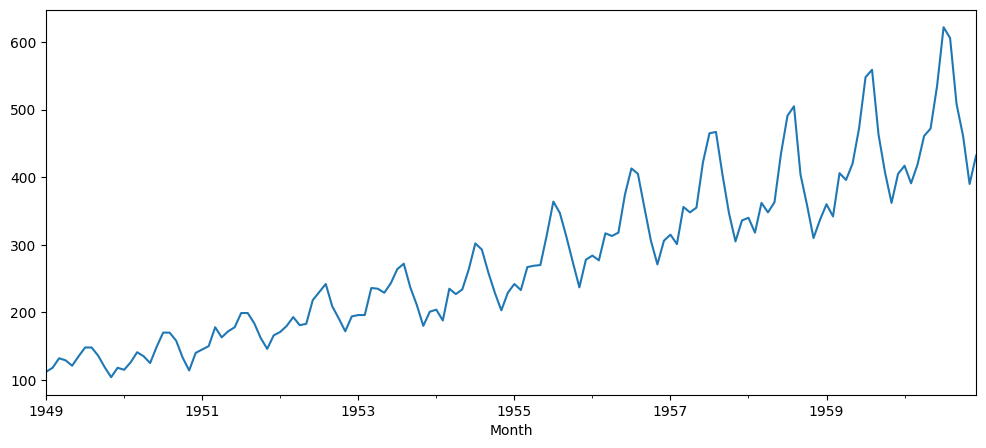

In [3]:
df['Passengers'].plot(figsize=(12,5))

In [4]:
from statsmodels.tsa.seasonal import STL

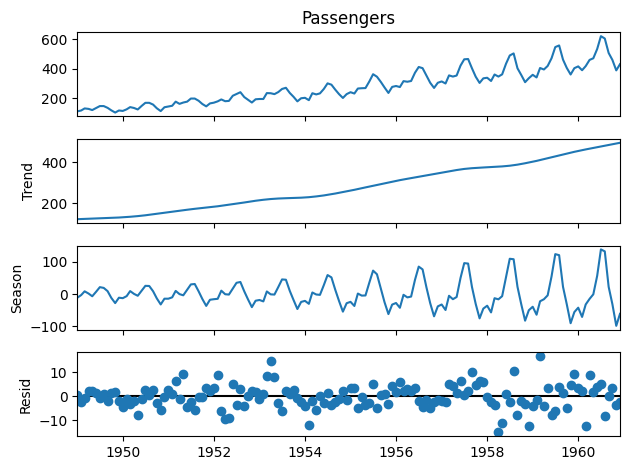

<Figure size 1200x500 with 0 Axes>

In [5]:
res = STL(df['Passengers']).fit()

res.plot()
plt.figure(figsize=(12,5))
plt.show()

In [6]:
trend = res.trend
seasonal = res.seasonal
residuals = res.resid

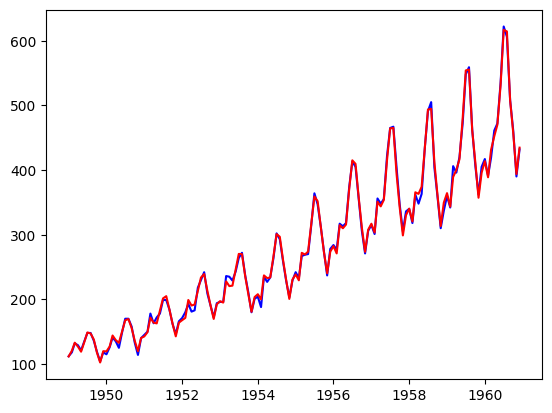

In [7]:
estimated = trend + seasonal
plt.plot(df['Passengers'], color='blue')
plt.plot(estimated, color='red')
plt.show()

In [8]:
estimated.fillna(0)

Month
1949-01-01    111.611308
1949-02-01    120.506484
1949-03-01    132.934435
1949-04-01    126.856147
1949-05-01    119.043949
                 ...    
1960-08-01    614.327198
1960-09-01    507.836100
1960-10-01    457.461659
1960-11-01    393.747850
1960-12-01    434.599270
Length: 144, dtype: float64

In [9]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df['Passengers'], estimated.fillna(0))

25.39828544861412